## TDI Notebook
### Section I
#### Jeffrey Kwarsick
Section 1:
Propose a project to do while at The Data Incubator. We want to know about your ability to think at a high level. Try to think of projects that users or businesses will care about that are also relatively unanalyzed. Here are some useful links about data sources on our blog as well as the archive of data sources on Data is Plural. You can see some final projects of previous Fellows on our YouTube Page.

Propose a project that uses a large, publicly accessible dataset. Explain your motivation for tackling this problem, discuss the data source(s) you are using, and explain the analysis you are performing. At a minimum, you will need to do enough exploratory data analysis to convince someone that the project is viable and generate two interesting non-trivial plots or other assets supporting this. Explain the plots and give url links to them. For guidance on how to choose a project, check out this blog post.

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
import scipy as sci
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import time
from datetime import datetime
from bs4 import BeautifulSoup
import requests
from itertools import combinations 

plt.style.use('ggplot')
today = datetime.now()
month = today.strftime("%b")
day   = today.strftime("%d")

In [3]:
data = pd.read_csv("Replication_Data.csv")
data

,test_id,test_strain,leafly_strain,no_match,thc_max,cbd_max,date_test,year,org_name,org_active,...,chemotype,strain_category,strain_leafly_page_rank,strain_leafly_review_rank,strain_tests,strain_chemotype,strain_prop_chemotype1,strain_prop_chemotype2,strain_prop_chemotype3,strain_modal_chemo_prop
0,19,Dutch Hawaiian,dutch-hawaiian,0,20.130900,0.540000,6/19/2014 11:33,2014,F.O.L GENETICS,1,...,1,Sativa,619.0,141.0,425.0,1.0,1.0,0.0,0.0,1.0
1,20,Shiska Berry,shishkaberry,0,13.501900,0.000000,6/19/2014 11:36,2014,F.O.L GENETICS,1,...,1,Indica,255.0,118.0,139.0,1.0,1.0,0.0,0.0,1.0
2,21,Sleestack,sleestack,0,9.913900,0.000000,6/19/2014 11:42,2014,F.O.L GENETICS,1,...,1,Sativa,1276.0,151.0,63.0,1.0,1.0,0.0,0.0,1.0
3,22,Space Needle,NaN,1,10.813200,0.000000,6/19/2014 11:45,2014,F.O.L GENETICS,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23,Double Purple Doja,double-purple-doja,0,11.670200,0.000000,6/20/2014 20:34,2014,F.O.L GENETICS,1,...,1,Indica,1115.0,151.0,52.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215280,235340,Mixed,NaN,1,23.066600,0.337860,5/31/2017 21:04,2017,PROHIBITION BRANDS,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215281,235342,Mixed,NaN,1,34.773640,31.545730,5/31/2017 21:50,2017,SKAGIT ORGANICS,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215282,235343,Mixed,NaN,1,8.682877,0.001877,5/31/2017 21:57,2017,SKAGIT ORGANICS,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215283,235344,Jah Goo,NaN,1,93.562640,2.462878,5/31/2017 22:03,2017,SKAGIT ORGANICS,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,test_id,no_match,thc_max,cbd_max,year,org_active,chemotype,strain_leafly_page_rank,strain_leafly_review_rank,strain_tests,strain_chemotype,strain_prop_chemotype1,strain_prop_chemotype2,strain_prop_chemotype3,strain_modal_chemo_prop
count,215285.000000,215285.000000,215285.000000,215285.000000,215285.000000,215285.000000,215285.000000,153140.000000,153363.000000,153363.000000,153363.000000,153363.000000,153363.000000,153363.000000,153363.000000
mean,115078.154716,0.287628,28.907816,1.026223,2015.855582,0.989117,1.047007,316.263595,81.017860,1488.178602,1.036775,0.965738,0.025775,0.008487,0.978393
std,66539.216592,0.452658,21.675084,4.932565,0.794778,0.103754,0.247432,410.353056,52.994561,2285.987738,0.235819,0.135782,0.099260,0.066664,0.068134
min,19.000000,0.000000,0.000000,0.000000,2014.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.435484
25%,57298.000000,0.000000,16.684400,0.030000,2015.000000,1.000000,1.000000,30.000000,30.000000,230.000000,1.000000,0.989011,0.000000,0.000000,0.989011
50%,114695.000000,0.000000,20.930000,0.130000,2016.000000,1.000000,1.000000,119.000000,87.000000,698.000000,1.000000,0.995885,0.003387,0.000000,0.995885
75%,172457.000000,1.000000,27.386500,0.380000,2016.000000,1.000000,1.000000,433.000000,133.000000,1648.000000,1.000000,1.000000,0.009600,0.000667,1.000000
max,235345.000000,1.000000,100.000000,96.950000,2017.000000,1.000000,3.000000,1898.000000,152.000000,10267.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
yrs = np.arange(2014,2018,1).reshape(4,1)
bar = data.groupby('year')['org_name'].nunique()
Y   = np.array(bar).reshape(4,1)

In [59]:
lin_reg = LinearRegression()
lin_reg.fit(yrs,Y)
m = lin_reg.coef_[0][0]
b = lin_reg.intercept_[0]
yhat = lin_reg.predict(yrs)

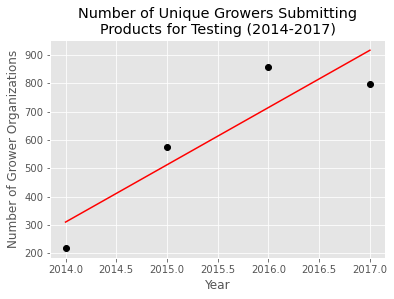

In [106]:
plt.plot(yrs, np.array(bar), 'ko', label="Number of Unique Growers")
plt.plot(yrs, yhat, 'r-', label="Trendline for Unique Growers")
plt.xlabel("Year")
plt.ylabel("Number of Grower Organizations")
plt.title("Number of Unique Growers Submitting\nProducts for Testing (2014-2017)")
plt.savefig("output1.png", dpi=300)
plt.show()

In [93]:
labs = data.groupby('year')['lab_name'].nunique()
labs

year
2014    12
2015    15
2016    18
2017    18
Name: lab_name, dtype: int64

In [65]:
data.columns

Index(['test_id', 'test_strain', 'leafly_strain', 'no_match', 'thc_max',
       'cbd_max', 'date_test', 'year', 'org_name', 'org_active', 'lab_name',
       'inventory_type', 'chemotype', 'strain_category',
       'strain_leafly_page_rank', 'strain_leafly_review_rank', 'strain_tests',
       'strain_chemotype', 'strain_prop_chemotype1', 'strain_prop_chemotype2',
       'strain_prop_chemotype3', 'strain_modal_chemo_prop'],
      dtype='object')

In [66]:
data.inventory_type.unique()

array(['Flower Lot', 'Kief', 'Marijuana Extract for Inhalation',
       'Bubble Hash', 'CO2 Hash Oil', 'Infused Cooking Oil',
       'Solid Marijuana Infused Edible', 'Hash',
       'Food Grade Solvent Extract', 'Liquid Marijuana Infused Edible',
       'Hydrocarbon Wax', 'Infused Dairy Butter or Fat in Solid Form',
       'Marijuana Infused Topicals', 'Marijuana Mix',
       'Marijuana Mix Packaged', 'Marijuana Mix Infused', 'Capsule',
       'Tincture', 'Suppository'], dtype=object)

In [72]:
products_byYear = data.groupby('year')['inventory_type'].nunique()

In [73]:
products_byYear

year
2014    13
2015    16
2016    19
2017    19
Name: inventory_type, dtype: int64

In [75]:
data.groupby('inventory_type')['year'].nunique()

inventory_type
Bubble Hash                                  4
CO2 Hash Oil                                 4
Capsule                                      2
Flower Lot                                   4
Food Grade Solvent Extract                   4
Hash                                         4
Hydrocarbon Wax                              4
Infused Cooking Oil                          4
Infused Dairy Butter or Fat in Solid Form    4
Kief                                         4
Liquid Marijuana Infused Edible              4
Marijuana Extract for Inhalation             4
Marijuana Infused Topicals                   4
Marijuana Mix                                3
Marijuana Mix Infused                        3
Marijuana Mix Packaged                       3
Solid Marijuana Infused Edible               4
Suppository                                  2
Tincture                                     2
Name: year, dtype: int64

In [85]:
data['COUNTER'] = 1 
data.groupby(['year', 'inventory_type'])['COUNTER'].sum()

year  inventory_type                
2014  Bubble Hash                         39
      CO2 Hash Oil                       202
      Flower Lot                        8032
      Food Grade Solvent Extract         104
      Hash                                18
                                        ... 
2017  Marijuana Mix Infused              641
      Marijuana Mix Packaged              21
      Solid Marijuana Infused Edible    1900
      Suppository                          7
      Tincture                            15
Name: COUNTER, Length: 67, dtype: int64

In [86]:
products = data.groupby(['year', 'inventory_type'])['COUNTER'].sum()

In [102]:
products[2017]

inventory_type
Bubble Hash                                    217
CO2 Hash Oil                                  2164
Capsule                                        128
Flower Lot                                   29251
Food Grade Solvent Extract                     725
Hash                                           301
Hydrocarbon Wax                               6931
Infused Cooking Oil                             42
Infused Dairy Butter or Fat in Solid Form       39
Kief                                           410
Liquid Marijuana Infused Edible                434
Marijuana Extract for Inhalation               557
Marijuana Infused Topicals                     158
Marijuana Mix                                  960
Marijuana Mix Infused                          641
Marijuana Mix Packaged                          21
Solid Marijuana Infused Edible                1900
Suppository                                      7
Tincture                                        15
Name: COUNTER, d

In [103]:
mei = [products[i]['Marijuana Extract for Inhalation'] for i in range(2014,2018,1)]
mei

[484, 4979, 1662, 557]

In [104]:
hcw = [products[i]['Hydrocarbon Wax'] for i in range(2014,2018,1)]
hcw

[177, 3947, 11974, 6931]

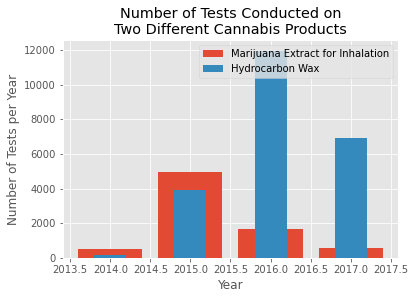

In [122]:
plt.bar(np.arange(2014,2018,1), mei, width=0.8, label='Marijuana Extract for Inhalation')
plt.bar(np.arange(2014,2018,1), hcw, width=0.4, label='Hydrocarbon Wax')
plt.xlabel("Year")
plt.ylabel("Number of Tests per Year")
plt.title("Number of Tests Conducted on\nTwo Different Cannabis Products")
plt.legend(loc="best")
plt.savefig("output2.png", dpi=300)
plt.show()

In [94]:
num_tests = data.groupby('year')['COUNTER'].sum()
num_tests

year
2014      9793
2015     56406
2016    104185
2017     44901
Name: COUNTER, dtype: int64